<a href="https://colab.research.google.com/github/ShreyashDhoot/DataQuest/blob/main/Dataquest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.utils import class_weight
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

# Load and prepare data
df = pd.read_csv("Train_Data.csv")
df["Sepssis"] = df["Sepssis"].map({"Negative": 0, "Positive": 1})
df = df.dropna()

X = df.drop("Sepssis", axis=1).values
y = df["Sepssis"].values

# Split BEFORE scaling to avoid data leakage
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit scaler on training data only
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Compute class weights to handle imbalance
weights = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights = dict(enumerate(weights))

# Build MLP model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.5),

    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),

    Dense(32, activation='relu'),
    Dropout(0.5),

    Dense(1, activation='sigmoid')
])



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile and train
model.compile(optimizer=Adam(0.001), loss='binary_crossentropy')
model.fit(X_train_scaled, y_train, epochs=35, batch_size=64, class_weight=class_weights, verbose=1)

# Predict and evaluate
y_pred_probs = model.predict(X_val_scaled).flatten()
y_pred = (y_pred_probs > 0.5).astype(int)
f1 = f1_score(y_val, y_pred)

print(f"\n✅ F1 Score on validation set: {f1:.4f}")

Epoch 1/35
487/487 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.7479
Epoch 2/35
487/487 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.5128
Epoch 3/35
487/487 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.4722
Epoch 4/35
487/487 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.4515
Epoch 5/35
487/487 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.4329
Epoch 6/35
487/487 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.4056
Epoch 7/35
487/487 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.3859
Epoch 8/35
487/487 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.3645
Epoch 9/35
487/487 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.3405
Epoch 10/35
487/487 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.3299
Epoch 11/35
487/487 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.3116
Epoch 12/35
487/487 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.2976
Epoch 13/35
487/487 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.2802
Epoch 14/35
487/487 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.2822
Epoch 15/35
487/487 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - lo

Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


487/487 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.5740 - val_loss: 0.3574
Epoch 2/30
487/487 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.4117 - val_loss: 0.2775
Epoch 3/30
487/487 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.3590 - val_loss: 0.2120
Epoch 4/30
487/487 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.3125 - val_loss: 0.1649
Epoch 5/30
487/487 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.2711 - val_loss: 0.1227
Epoch 6/30
487/487 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.2452 - val_loss: 0.0905
Epoch 7/30
487/487 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.2169 - val_loss: 0.0721
Epoch 8/30
487/487 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.1912 - val_loss: 0.0617
Epoch 9/30
487/487 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.1770 - val_loss: 0.0437
Epoch 10/30
487/487 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.1651 - val_loss: 0.0313
Epoch 11/30
487/487 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.1468 - val_loss: 0.0239
Epoch 12/30
487/487 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.

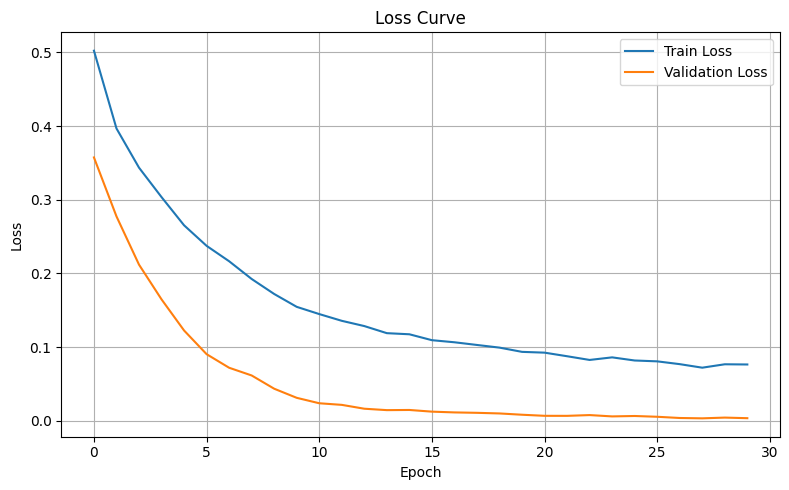

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.utils import class_weight
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.callbacks import EarlyStopping

# Load & preprocess
df = pd.read_csv("Train_Data.csv")
df["Sepssis"] = df["Sepssis"].map({"Negative": 0, "Positive": 1})
df = df.dropna()

X = df.drop("Sepssis", axis=1).values
y = df["Sepssis"].values

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Class weights
weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights = dict(enumerate(weights))

# Build model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),

    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(32, activation='relu'),
    Dropout(0.3),

    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(0.001), loss='binary_crossentropy')

# Optional early stopping
# early_stop = EarlyStopping(patience=5, restore_best_weights=True)

# Train model with validation tracking
history = model.fit(
    X_train_scaled, y_train,
    epochs=30,
    batch_size=64,
    class_weight=class_weights,
    validation_data=(X_val_scaled, y_val),
    # callbacks=[early_stop],
    verbose=1
)

# Predict and evaluate
y_val_probs = model.predict(X_val_scaled).flatten()
y_val_pred = (y_val_probs > 0.5).astype(int)
val_f1 = f1_score(y_val, y_val_pred)

y_train_probs = model.predict(X_train_scaled).flatten()
y_train_pred = (y_train_probs > 0.5).astype(int)
train_f1 = f1_score(y_train, y_train_pred)

print(f"\n✅ F1 Score - Train: {train_f1:.4f} | Validation: {val_f1:.4f}")

# Plot loss curves
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss Curve")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Load test data
test_df = pd.read_csv("Test_Data.csv")  # Update filename if needed

# Handle missing values (if any)
test_df = test_df.dropna()

# Scale test features using the same scaler from training
X_test = scaler.transform(test_df.values)

# Predict using trained MLP
test_probs = model.predict(X_test).flatten()
test_preds = (test_probs > 0.5).astype(int)

# Create submission dataframe
submission = pd.DataFrame({"Sepssis": test_preds})

# Save to CSV
submission.to_csv("submission.csv", index=False)
print("✅ Submission file saved as 'submission.csv'")


19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
✅ Submission file saved as 'submission.csv'


In [ ]:
# Load the predictions CSV
df = pd.read_csv("submission.csv")

# Replace values in the 'Sepssis' column
df["Sepssis"] = df["Sepssis"].map({1: "Positive", 0: "Negative"})

# Save the updated file
df.to_csv("submission_mapped.csv", index=False)

print("✅ Saved updated file as 'submission_mapped.csv'")

✅ Saved updated file as 'submission_mapped.csv'


In [ ]:
from google.colab import files
files.download("submission_mapped.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<ipython-input-69-c2dd1938d419>:20: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


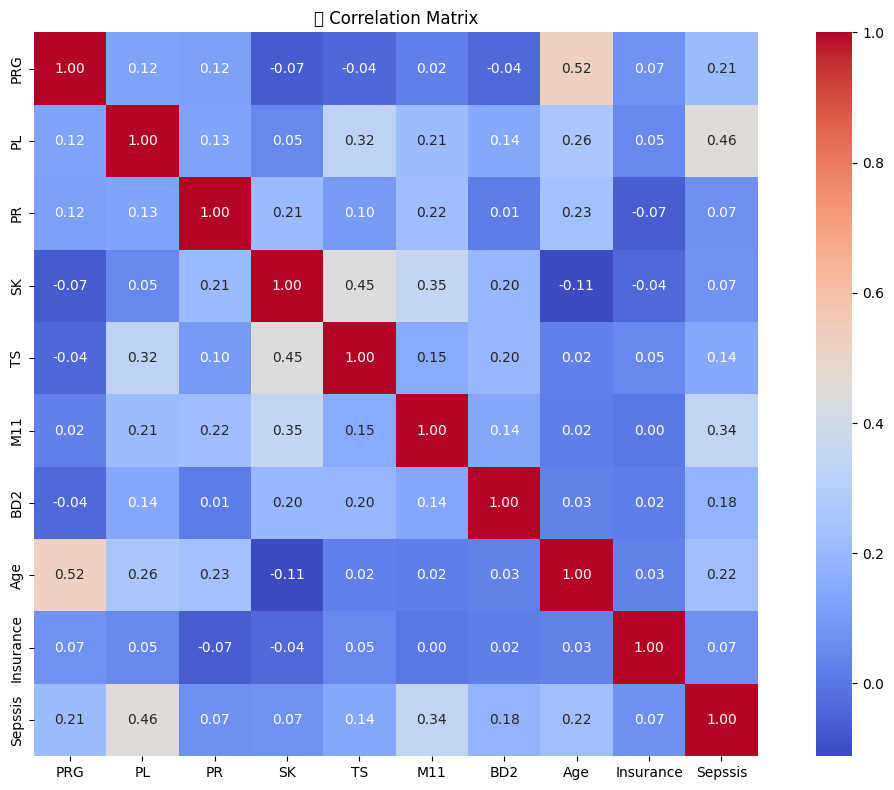


🔍 Correlation of Features with 'Sepssis':
PL           0.455368
M11          0.336781
Age          0.223214
PRG          0.212270
BD2          0.180463
TS           0.142817
SK           0.073079
PR           0.067895
Insurance    0.067006
Name: Sepssis, dtype: float64


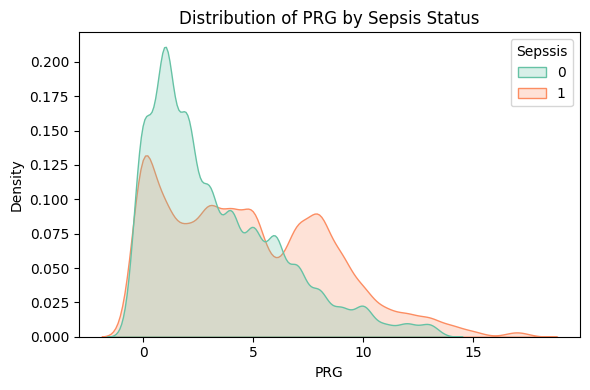

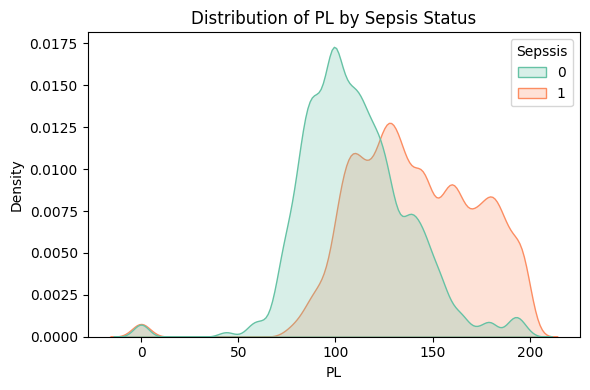

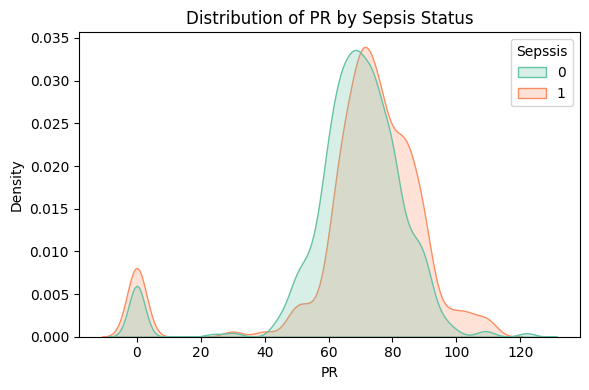

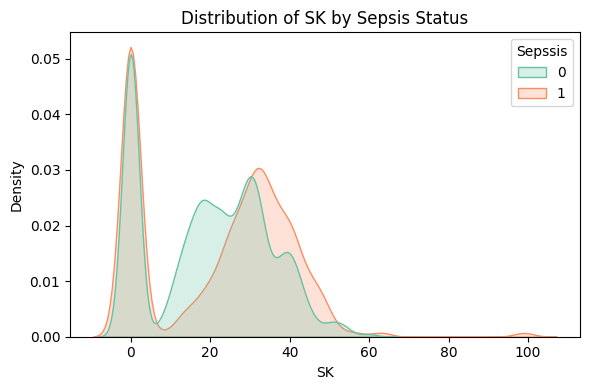

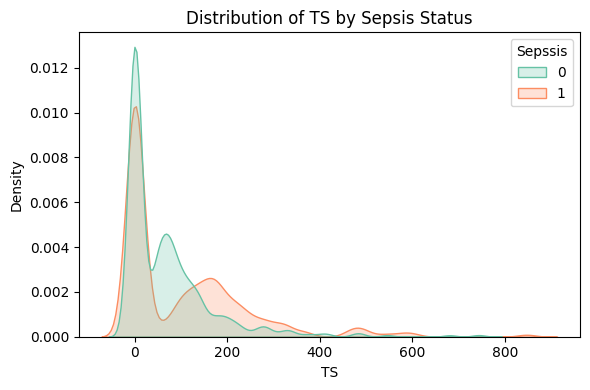

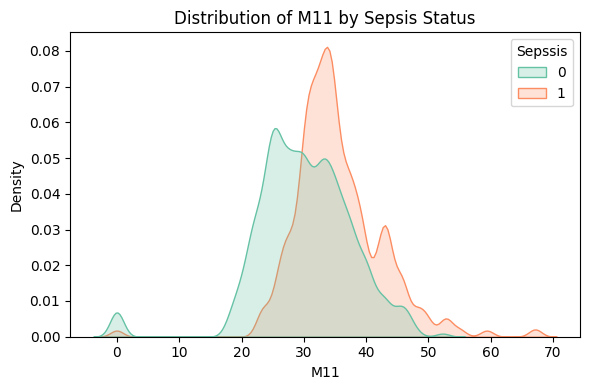

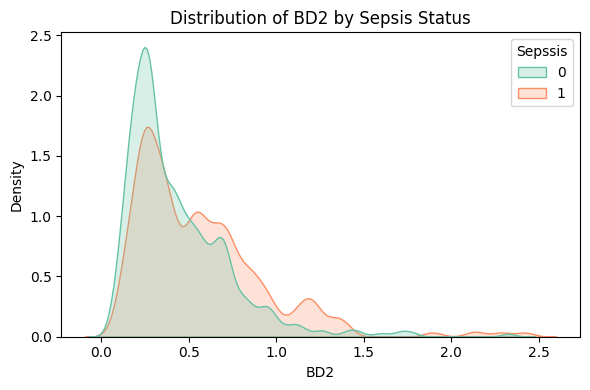

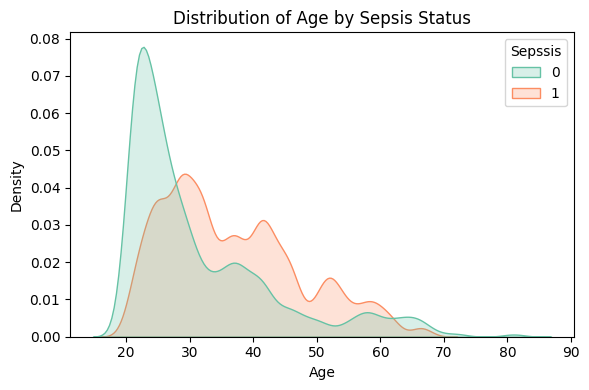

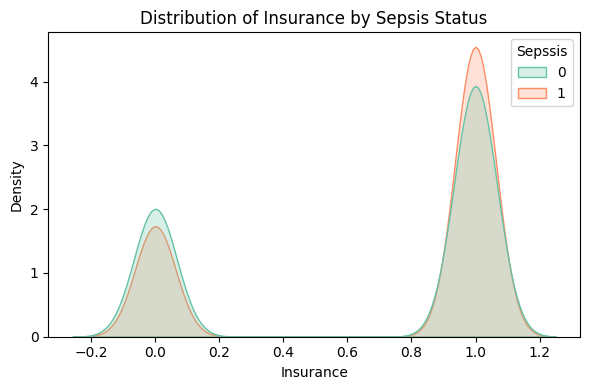


✅ No highly correlated feature pairs above threshold.


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load dataset
df = pd.read_csv("Train_Data.csv")

# Encode target
df["Sepssis"] = df["Sepssis"].map({"Negative": 0, "Positive": 1})

# Drop missing values
df = df.dropna()

# --- 1. Correlation Matrix (including target) ---
plt.figure(figsize=(12, 8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("📊 Correlation Matrix")
plt.tight_layout()
plt.show()

# --- 2. Feature Correlation with Target ---
target_corr = corr["Sepssis"].drop("Sepssis").sort_values(key=abs, ascending=False)
print("\n🔍 Correlation of Features with 'Sepssis':")
print(target_corr)

# --- 3. Distribution of Features by Target ---
import warnings
warnings.filterwarnings("ignore")

features = df.columns.drop("Sepssis")
for feature in features:
    plt.figure(figsize=(6, 4))
    sns.kdeplot(data=df, x=feature, hue="Sepssis", fill=True, common_norm=False, palette="Set2")
    plt.title(f"Distribution of {feature} by Sepsis Status")
    plt.tight_layout()
    plt.show()

# --- 4. Highly Correlated Feature Pairs (Multicollinearity Check) ---
threshold = 0.85  # Adjust if needed
high_corr_pairs = []

for i in range(len(corr.columns)):
    for j in range(i+1, len(corr.columns)):
        corr_val = corr.iloc[i, j]
        if abs(corr_val) > threshold:
            high_corr_pairs.append((corr.index[i], corr.columns[j], corr_val))

if high_corr_pairs:
    print("\n⚠️ Highly Correlated Feature Pairs (> 0.85):")
    for a, b, val in high_corr_pairs:
        print(f"{a} ↔ {b}: {val:.2f}")
else:
    print("\n✅ No highly correlated feature pairs above threshold.")


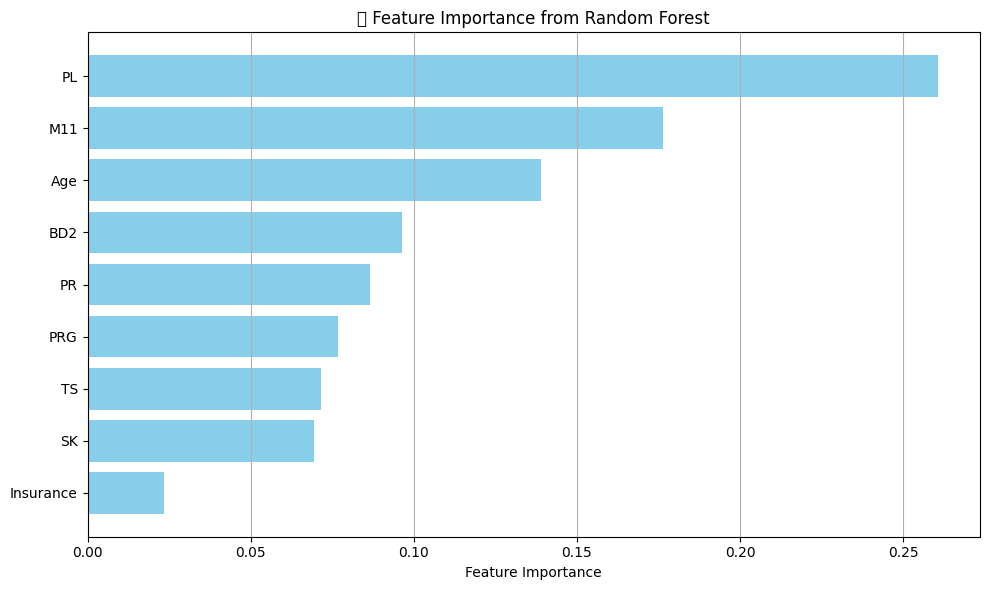

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

# Load & preprocess
df = pd.read_csv("Train_Data.csv")
df["Sepssis"] = df["Sepssis"].map({"Negative": 0, "Positive": 1})
df = df.dropna()

X = df.drop("Sepssis", axis=1)
y = df["Sepssis"]

# Scale features (optional for RF, but good if you want to compare)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_scaled, y)

# Get feature importances
importances = rf.feature_importances_
feature_names = X.columns

# Sort
indices = np.argsort(importances)[::-1]
sorted_features = feature_names[indices]
sorted_importances = importances[indices]

# Plot
plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_importances, color="skyblue")
plt.xlabel("Feature Importance")
plt.title("📊 Feature Importance from Random Forest")
plt.gca().invert_yaxis()
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score

# Predict probabilities
y_val_probs = model.predict(X_val_scaled).flatten()

# Convert to binary predictions
y_val_pred = (y_val_probs > 0.5).astype(int)

# Compute accuracy
accuracy = accuracy_score(y_val, y_val_pred)

print(f"✅ Accuracy on Validation Set: {accuracy:.4f}")


244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
✅ Accuracy on Validation Set: 0.9999


244/244 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


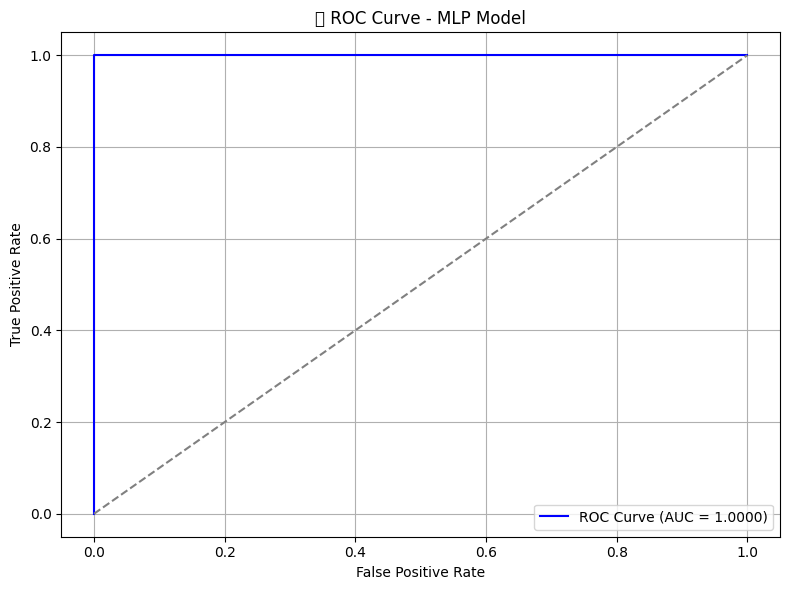

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Predict probabilities
y_val_probs = model.predict(X_val_scaled).flatten()

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_val, y_val_probs)
roc_auc = auc(fpr, tpr)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.4f})', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("📈 ROC Curve - MLP Model")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
print("AUC:", roc_auc)
print("F1 Score:", f1_score(y_val, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_pred))


AUC: 1.0
F1 Score: 0.9998731447418495
Confusion Matrix:
[[3842    1]
 [   0 3941]]


<Axes: >

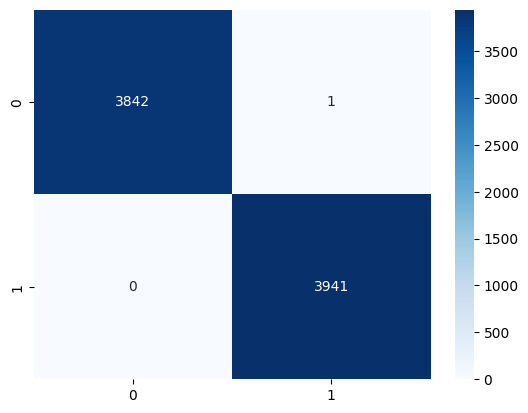

In [ ]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_val, y_pred), annot=True, fmt="d", cmap="Blues")
